<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', 50)
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Посмотрим количество пропусков

In [3]:

data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Посмотрим количество дубликотов

In [4]:

data.duplicated().sum()

0

### Вывод

Данные содержат 22 столбца, всего строк 23699. Много пропусков, которые придется заполнять. Много типов данных, которые надо будет тоже менять. Хорошо, что нет дубликатов.

## Предобработка данных

Удалим пропуски в столбце locality_name, их просто меньше всего, поэтому начал с него :) Пропуски случайны, возможно из-за потери данных. Пропусков немного, поэтому если удалить то на данные это не повлияет

In [5]:

data.dropna(subset=['locality_name'],inplace=True)
data['locality_name'].isna().sum()

0

Заполним пропуски в столбце ceiling_height медианными значениями высоты потолков. Пропуски тоже случайны, может быть из-за потери данных. Правильнее будет заполнить пропуски медианным значением, чтобы не влияло на общую статистику.

In [6]:

median_ceiling_height = data['ceiling_height'].median()
data['ceiling_height'].fillna(median_ceiling_height, inplace = True)
#Проверим количество пропусков в столбце ceiling_height
data['ceiling_height'].isna().sum()

0

Проверим количество пропусков в столбце ceiling_height

In [7]:
data['ceiling_height'].isna().sum()

0

Заполним пропуски с столбце balcony нулем. Пропуск случайный. Просто скорее всего его не заполнили в виду отсутствия балкона. ПОэтому и заполняем пропуски нулем.

In [8]:
data['balcony']=data['balcony'].fillna(0)

Поменяем тип данных столбца на int

In [9]:
data['balcony'].astype('int64')

0        0
1        2
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, Length: 23650, dtype: int64

Проверим количество пропусков

In [10]:
data['balcony'].isna().sum()

0

Заполним пропуски в столбце is_apartment тоже нулем. Скорее всего не случайный пропуск. Потому что почти 21000 квартир не имеют статус в этом столбце. Скорее всего продавцы просто не знали квартира это для постоянного проживания или апартаменты для временного. Если я правильно понял значение столбца :)

In [11]:

data['is_apartment']=data['is_apartment'].fillna(False)


Проверим количство пропусков

In [12]:
data['is_apartment'].isnull().sum()

0

Пропуски в столбце parks_around3000 заполняем срединим. Не случайный пропуск. Просто продавцы скорее всего не знали есть ли парк в радиусе 3км. А если и знали, что он есть, то не знали в радиусе он 3км или нет, поэтому решили вообще не заполнять. Лучше заполнить средним, чтобы не повлияло на статистику.

In [13]:
data['parks_around3000']=data['parks_around3000'].fillna(data['parks_around3000'].mean())

Проверим количство пропусков

In [14]:
data['parks_around3000'].isnull().sum()

0

Переведем тип данных в int

In [15]:
data['parks_around3000']=data['parks_around3000'].astype('int64')

Пропуски в столбце parks_nearest заполняем срединим. Тоже не случайный, просто продавцы скорее всего не знали есть ли парк рядом. Да и понятие рядом для каждого свое. Лучше заполнить средним, чтобы не повлияло на статистику.

In [16]:
data['parks_nearest']=data['parks_nearest'].fillna(data['parks_nearest'].mean())
data['parks_nearest'].isnull().sum()

0

Пропуски в столбце ponds_around3000 заполняем срединим. Так же как и с парками. Лучше заполнить средним, чтобы не повляило на статистику.

In [17]:
data['ponds_around3000']=data['ponds_around3000'].fillna(data['ponds_around3000'].mean())
data['ponds_around3000'].isnull().sum()

0

Переведем тип данных в int

In [18]:
data['ponds_around3000']=data['ponds_around3000'].astype('int64')

Пропуски в столбце ponds_nearest заполняем срединим. Пропуски не случайны, просто продавцы не знали есть ли рядом водоем. Лучше пропуск заполнить средним значением по столбцу.

In [19]:
data['ponds_nearest']=data['ponds_nearest'].fillna(data['ponds_nearest'].mean())

Проверим количство пропусков

In [20]:
data['ponds_nearest'].isnull().sum()

0

Пропуски в столбце floors_total заполняем срединим. Случайный пропуск, скорее всего из-за потери данных. Лучше заполнить средним значением по столбцу, чтобы не измениласть статистика.

In [21]:
data['floors_total']=data.fillna(data['floors_total'].mean())

Переведем тип данных в int

In [22]:
data['floors_total']=data['floors_total'].astype('int64')

Проверим количство пропусков

In [23]:
data['floors_total'].isnull().sum()

0

Пропуски в столбце days_exposition заполняем медианой. Тоже случайный пропуск, возожно из-за потери данных. Заполняем пропуски медианным значением, чтобы не испортить статистику.

In [24]:
data['days_exposition']=data['days_exposition'].fillna(data['days_exposition'].median())

Переведем тип данных в int

In [25]:
data['days_exposition']=data['days_exposition'].astype('int64')

Проверим количство пропусков

In [26]:
data['days_exposition'].isnull().sum()

0

Пропуски в столбце kitchen_area заполняем медианой. Не случайный пропуск, скорее всего продавцы не знали точно сколько площадь кухни. Площадь квартиры могут знать многие, а вот площадь кухни наверно мало кто знает) Так же лучше заполнить пропуски медианным значением.

In [27]:
data['kitchen_area']=data['kitchen_area'].fillna(data['kitchen_area'].median())

Проверим количство пропусков

In [28]:
data['kitchen_area'].isnull().sum()

0

Добавим столбец цены за м2

In [29]:
data['price_for_m2']=data['last_price']/data['living_area']
grouped_price=data.groupby('locality_name')['price_for_m2'].mean()
grouped_price.sort_values()

locality_name
деревня Малая Романовка    14808.362369
деревня Старополье         14851.485149
деревня Выскатка           18856.907895
поселок Тёсово-4           20833.333333
поселок Совхозный          22600.000000
                               ...     
поселок Севастьяново                NaN
поселок станции Лужайка             NaN
посёлок Левашово                    NaN
посёлок Петро-Славянка              NaN
посёлок Плоское                     NaN
Name: price_for_m2, Length: 364, dtype: float64

In [30]:
#grouped_price.isna().sum()
data['price_for_m2'].fillna(grouped_price,inplace=True)
data.dropna(subset=['price_for_m2'],inplace=True)
data['price_for_m2'].isnull().sum()
data['living_area'].fillna(data['last_price']/data['price_for_m2'],inplace=True)
data['price_for_m2'].isnull().sum()

0

Заполним пропуски в столбце airports_nearest
Группируем по району. Пропуск скорее всего случайный, из-за потери данных. Наверно сложно не знать есть ли у тебя рядом аэропорт. Самолеты все-таки громкие. Лучше заполнить средним значением в зависимости от территории. 

In [31]:
grouped_airpots_nearest=data.groupby('locality_name')['airports_nearest'].transform('mean') 
#data['airports_nearest'].isnull().sum()

Заполняем пропуски по среднему расстоянию в зависимости от района

In [32]:
data['airports_nearest'].fillna(grouped_airpots_nearest,inplace=True)
#data['airports_nearest'].isnull().sum()

Остальные заполняем по среднему значению

In [33]:

data['airports_nearest']=data['airports_nearest'].fillna(data['airports_nearest'].mean())
data['airports_nearest'].isnull().sum()

0

Со столбцом cityCenters_nearest поступаем так же как и со столбцом airports_nearest. Тоже случайный пропуск, возможно из-за потери данных. И тоже лучше заполнить исходя из района.

In [34]:

data['cityCenters_nearest'].fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('mean'),inplace=True)
data['cityCenters_nearest']=data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].mean())
data['cityCenters_nearest'].isnull().sum()

0

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21752 entries, 0 to 23698
Data columns (total 23 columns):
total_images            21752 non-null int64
last_price              21752 non-null float64
total_area              21752 non-null float64
first_day_exposition    21752 non-null object
rooms                   21752 non-null int64
ceiling_height          21752 non-null float64
floors_total            21752 non-null int64
living_area             21752 non-null float64
floor                   21752 non-null int64
is_apartment            21752 non-null bool
studio                  21752 non-null bool
open_plan               21752 non-null bool
kitchen_area            21752 non-null float64
balcony                 21752 non-null float64
locality_name           21752 non-null object
airports_nearest        21752 non-null float64
cityCenters_nearest     21752 non-null float64
parks_around3000        21752 non-null int64
parks_nearest           21752 non-null float64
ponds_around3000   

## Расчёты и добавление результатов в таблицу

Столбец с ценой квадратного метра создали ранее. Сейчас создадим столбцы с днем недели, месяцем и годом публикации объявления.
Перевожу в формат даты

In [36]:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'],format='%Y.%m.%dT%H:%M:%S')
data['week_day']=data['first_day_exposition'].dt.weekday
data['month']=data['first_day_exposition'].dt.month
data['year']=data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,week_day,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,20,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.000000,16028.000000,1,482.000000,2,755.000000,95,254901.960784,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,7,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.000000,18603.000000,0,490.830729,0,518.059879,81,180107.526882,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,10,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.000000,13933.000000,1,90.000000,2,574.000000,558,151486.880466,3,8,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,2,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.000000,8098.000000,2,112.000000,1,48.000000,121,312500.000000,1,6,2018
5,10,2890000.0,30.4,2018-09-10,1,2.65,10,14.4,5,False,False,False,9.1,0.0,городской посёлок Янино-1,28774.766121,14247.655369,0,490.830729,0,518.059879,55,200694.444444,0,9,2018


Категаризируем этажи. 

In [37]:
def floor_category(row):
    what_floor=row['floor']
    total_floor=row['floors_total']
    if what_floor==1:
        return 'Первый'
    if what_floor==total_floor:
        return 'Последний'
    return 'Другой'

Добавляем новый столбец

In [38]:
floor_position=data.apply(floor_category,axis=1)
data['floor_position']=floor_position
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,week_day,month,year,floor_position
0,20,13000000.0,108.0,2019-03-07,3,2.70,20,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.000000,16028.000000,1,482.000000,2,755.000000,95,254901.960784,3,3,2019,Другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,7,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.000000,18603.000000,0,490.830729,0,518.059879,81,180107.526882,1,12,2018,Первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,10,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.000000,13933.000000,1,90.000000,2,574.000000,558,151486.880466,3,8,2015,Другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,2,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.000000,8098.000000,2,112.000000,1,48.000000,121,312500.000000,1,6,2018,Другой
5,10,2890000.0,30.4,2018-09-10,1,2.65,10,14.4,5,False,False,False,9.1,0.0,городской посёлок Янино-1,28774.766121,14247.655369,0,490.830729,0,518.059879,55,200694.444444,0,9,2018,Другой


Отношение жилой площади к общей площади

In [39]:
data['living_area/total_area']=data['living_area']/data['total_area']

Отношение площади кухни к жилой площади

In [40]:

data['kitchen_area/living_area']=data['kitchen_area']/data['living_area'] 
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,week_day,month,year,floor_position,living_area/total_area,kitchen_area/living_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,20,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.000000,16028.000000,1,482.000000,2,755.000000,95,254901.960784,3,3,2019,Другой,0.472222,0.490196
1,7,3350000.0,40.4,2018-12-04,1,2.65,7,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.000000,18603.000000,0,490.830729,0,518.059879,81,180107.526882,1,12,2018,Первый,0.460396,0.591398
2,10,5196000.0,56.0,2015-08-20,2,2.65,10,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.000000,13933.000000,1,90.000000,2,574.000000,558,151486.880466,3,8,2015,Другой,0.612500,0.241983
4,2,10000000.0,100.0,2018-06-19,2,3.03,2,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.000000,8098.000000,2,112.000000,1,48.000000,121,312500.000000,1,6,2018,Другой,0.320000,1.281250
5,10,2890000.0,30.4,2018-09-10,1,2.65,10,14.4,5,False,False,False,9.1,0.0,городской посёлок Янино-1,28774.766121,14247.655369,0,490.830729,0,518.059879,55,200694.444444,0,9,2018,Другой,0.473684,0.631944


## Исследовательский анализ данных

Text(0, 0.5, 'Частота')

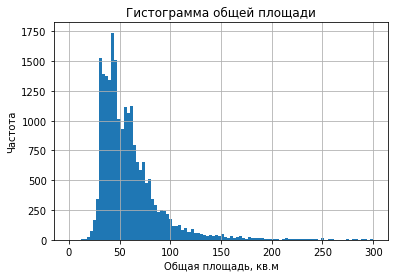

In [41]:
data['total_area'].hist(bins=100,range=(0,300))
plt.title('Гистограмма общей площади')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Частота')

Из гистограммы видно, что чаще всего продаются квартиры 47-49 м2

Text(0, 0.5, 'Частота')

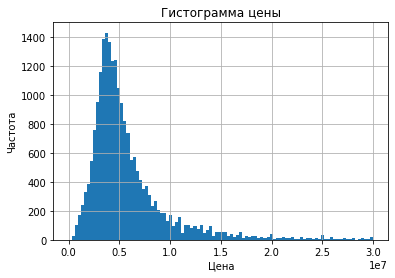

In [42]:
data['last_price'].hist(bins=100,range=(0,30000000))
plt.title('Гистограмма цены')
plt.xlabel('Цена')
plt.ylabel('Частота')

Text(0, 0.5, 'Частота')

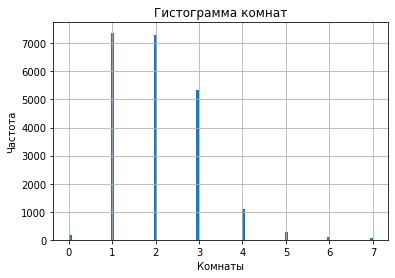

In [43]:
data['rooms'].hist(bins=100,range=(0,7))
plt.title('Гистограмма комнат')
plt.xlabel('Комнаты')
plt.ylabel('Частота')

Из гистограммы видно, что чаще всего продаются квартиры 1-3 комнаты

Text(0, 0.5, 'Частота')

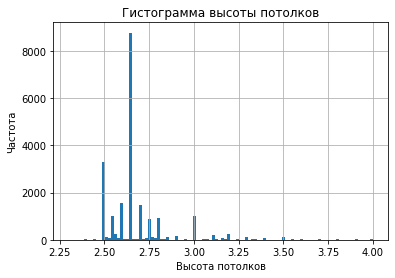

In [44]:
data['ceiling_height'].hist(bins=100,range=(2.3,4))
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Частота')

Больше всего продаж квартир с высотой потолков 2,6м

Text(0, 0.5, 'Частота')

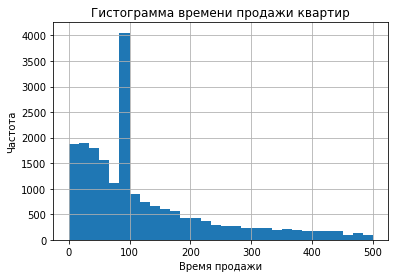

In [45]:
data['days_exposition'].hist(bins=30,range=(0,500))
plt.title('Гистограмма времени продажи квартир')
plt.xlabel('Время продажи')
plt.ylabel('Частота')

In [46]:
print('Медиана:',data['days_exposition'].median())
print('Среднее:',data['days_exposition'].mean())

Медиана: 95.0
Среднее: 172.44262596542848


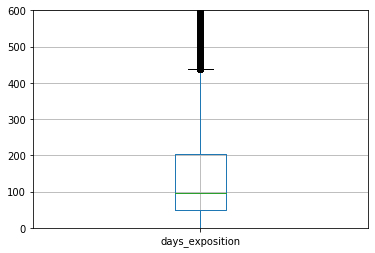

In [47]:
plt.ylim(0,600)
data.boxplot(column='days_exposition') 

Получается, что среднее время продажи квартиры, 95 дней. Большая часть значений лежит за пределом в 420 дней(примерно).
Можно считать, что самая быстрая продажа-это 1 день. Самая долгая продажа-это 420 дней. Большая часть лежит за пределами
1,5 межквартильного интервала

Уберем значения, находящиеся за этим интервалом

In [48]:
true_days_exposition_date=data.query('days_exposition<420')

Text(0, 0.5, 'Частота')

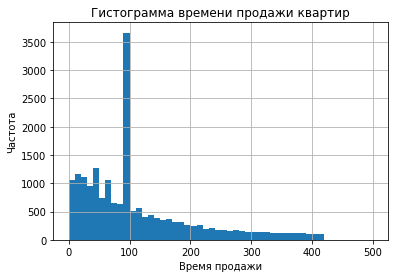

In [49]:
true_days_exposition_date['days_exposition'].hist(bins=50,range=(0,500))
plt.title('Гистограмма времени продажи квартир')
plt.xlabel('Время продажи')
plt.ylabel('Частота')

Наблюдается 4 пика. Самый большое в 95 дней. И примерно одинаковые пики в 10, 40 и 60 дней.

In [50]:
print('Медиана:',data['last_price'].median())
print('Среднее:',data['last_price'].mean())
print('Максимум', data['last_price'].max())
print('Минимум', data['last_price'].min())

Медиана: 4650000.0
Среднее: 6501327.275698787
Максимум 763000000.0
Минимум 12190.0


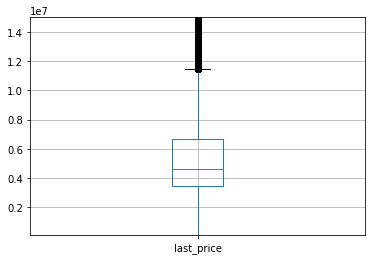

In [51]:
plt.ylim(100000,15000000)
true_days_exposition_date.boxplot(column='last_price')

В выбросы попадают квартиры стоимостью выше 11 млн. Их уберу.

In [52]:
true_days_exposition_date=true_days_exposition_date.query('last_price<11000000')


Медиана: 2.65
Среднее: 2.727450809121
Максимум 100.0
Минимум 1.0


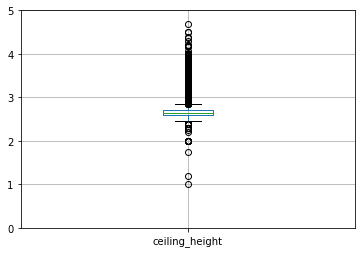

In [53]:
plt.ylim(0,5)
true_days_exposition_date.boxplot(column='ceiling_height')
print('Медиана:',data['ceiling_height'].median())
print('Среднее:',data['ceiling_height'].mean())
print('Максимум', data['ceiling_height'].max())
print('Минимум', data['ceiling_height'].min())

В высоте потолков наблюдается аномалия начиная примерно с 3-х метров. И меньше 2,4 метров. Их можно убрать

In [54]:
true_days_exposition_date=data.query('2.4<ceiling_height<3')

Аномалии в высоте потолков убрали

Медиана: 2.65
Среднее: 2.727450809121
Максимум 100.0
Минимум 1.0


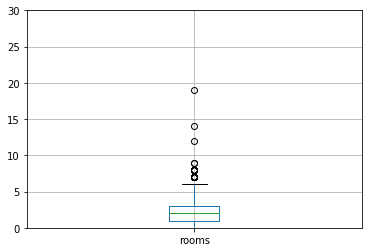

In [55]:
plt.ylim(0,30)
true_days_exposition_date.boxplot(column='rooms')
print('Медиана:',data['ceiling_height'].median())
print('Среднее:',data['ceiling_height'].mean())
print('Максимум', data['ceiling_height'].max())
print('Минимум', data['ceiling_height'].min())

In [56]:
true_days_exposition_date=data.query('rooms<6')

Так же убрали аномалии в столбце с комнатами. Больше 6 комнат

Коэффициент корреляции = 0.6697762920988798


Text(0, 0.5, 'Площадь')

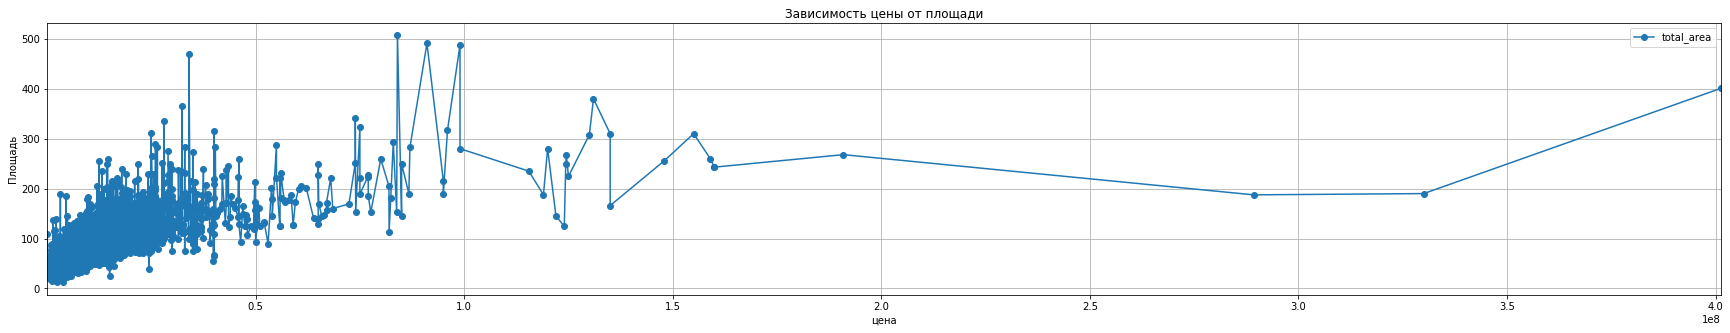

In [57]:
(true_days_exposition_date.sort_values(by='last_price',ascending=True).plot(x='last_price',y='total_area',grid=True, style='o-',figsize=(30,5)))
print('Коэффициент корреляции =' ,true_days_exposition_date['last_price'].corr(true_days_exposition_date['total_area']))
plt.title('Зависимость цены от площади')
plt.xlabel('цена')
plt.ylabel('Площадь')

Чем больше площадь, тем больше стоимость квартиры. Коэф Пирсона 0,68. Эти величины сильно зависят друг от друга. Карреляция
положительная

Коэффициент корреляции = 0.35222824142800163


Text(0, 0.5, 'Цена')

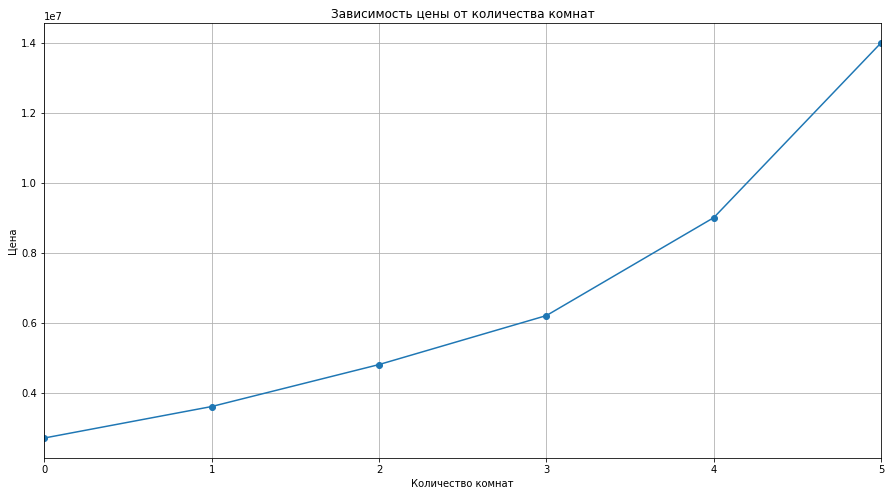

In [58]:
(true_days_exposition_date.groupby('rooms')['last_price'].median().plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(15,8)))

print('Коэффициент корреляции =',true_days_exposition_date['last_price'].corr(true_days_exposition_date["rooms"])) 
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')

Коэф Пирсона почти 0,45.Высокая положительная корреляция. 2 величины зависят друг от друга. Чем больше кол-во комнат, тем 
больше стоимость.

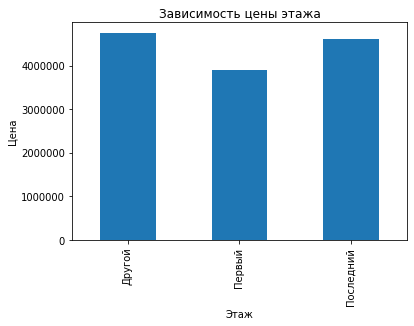

Коэффициент корреляции = 0.03126586505249674


In [59]:
(true_days_exposition_date.groupby('floor_position')['last_price'].median().plot(x='floor_position',y='last_price',kind='bar'))
plt.title('Зависимость цены этажа')
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.show()
print('Коэффициент корреляции =',true_days_exposition_date['floor'].corr(true_days_exposition_date['last_price']))


Коэф Пирсона 0,14. Величины не очень зависят друг от друга. Корреляция положительная. И по графику видно что Этаж почти
не влияет на цену.

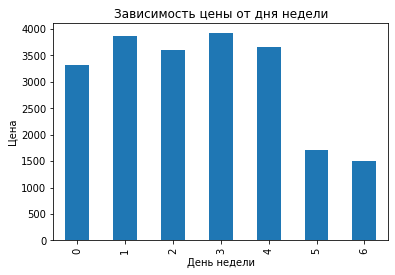

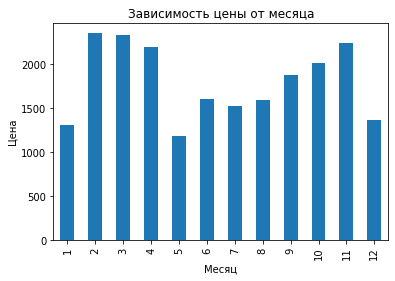

Text(0, 0.5, 'Цена')

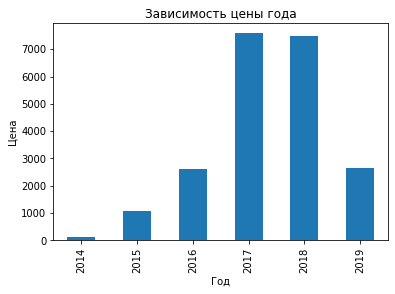

In [60]:
(true_days_exposition_date.groupby('week_day')['last_price'].count().plot(x='week_day',y='last_price',kind='bar'))
plt.title('Зависимость цены от дня недели')
plt.xlabel('День недели')
plt.ylabel('Цена')
plt.show()
(true_days_exposition_date.groupby('month')['last_price'].count().plot(x='month',y='last_price',kind='bar'))
plt.title('Зависимость цены от месяца')
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.show()
(true_days_exposition_date.groupby('year')['last_price'].count().plot(x='year',y='last_price',kind='bar'))
plt.title('Зависимость цены года')
plt.xlabel('Год')
plt.ylabel('Цена')


Из гистограмм видно:
    1. Меньше всего продаж в выходные. Логично. Люди отдыхают. В остальные дни примерно одинаково
    2. Меньше всего продаж в декабре, январе и мае. Тоже логично. В декабре, люди деньги тратят на подарки, в январе и мае
    много праздников и люди отдыхают.
    3. Больше всего продаж было в 2017 и 2018 году. Ну... пусть будет так :)

In [61]:
raiting_of_location=true_days_exposition_date.pivot_table(index='locality_name',values='price_for_m2',aggfunc=('count','median'))
raiting_of_location.sort_values(by='count',ascending=False).head(10)

,count,median
locality_name,,
Санкт-Петербург,14407,189349.112426
посёлок Мурино,461,172222.222222
посёлок Шушары,404,144803.591470
Всеволожск,371,124137.931034
Пушкин,342,182028.875380
Колпино,327,125581.395349
посёлок Парголово,301,199500.000000
Гатчина,292,116719.745223
деревня Кудрово,262,185655.696311


В Питере больше всего объявлений. И выше всего цена 1 м2

Добавим в таблицу столбец с расстоянием до центра в км

In [79]:
true_days_exposition_date['cityCenters_nearest_in_km']=true_days_exposition_date['cityCenters_nearest']/1000

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Посчитаем стоимость 1 км

In [63]:
true_days_exposition_date['cost_of_km']=true_days_exposition_date['last_price']/true_days_exposition_date['cityCenters_nearest_in_km']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Выделим только Питер

In [64]:
spb=true_days_exposition_date.query('locality_name=="Санкт-Петербург"')
spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,week_day,month,year,floor_position,living_area/total_area,kitchen_area/living_area,cityCenters_nearest_in_km,cost_of_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,20,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1,482.000000,2,755.000000,95,254901.960784,3,3,2019,Другой,0.472222,0.490196,16.028,8.110806e+05
2,10,5196000.0,56.0,2015-08-20,2,2.65,10,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1,90.000000,2,574.000000,558,151486.880466,3,8,2015,Другой,0.612500,0.241983,13.933,3.729276e+05
4,2,10000000.0,100.0,2018-06-19,2,3.03,2,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2,112.000000,1,48.000000,121,312500.000000,1,6,2018,Другой,0.320000,1.281250,8.098,1.234873e+06
9,18,5400000.0,61.0,2017-02-26,3,2.50,18,43.6,7,False,False,False,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0,490.830729,0,518.059879,289,123853.211009,6,2,2017,Другой,0.714754,0.149083,15.008,3.598081e+05
10,5,5050000.0,39.6,2017-11-16,1,2.67,5,20.3,3,False,False,False,8.5,0.0,Санкт-Петербург,38357.0,13878.0,1,310.000000,2,553.000000,137,248768.472906,3,11,2017,Другой,0.512626,0.418719,13.878,3.638853e+05


Text(0, 0.5, 'Стоимость м2')

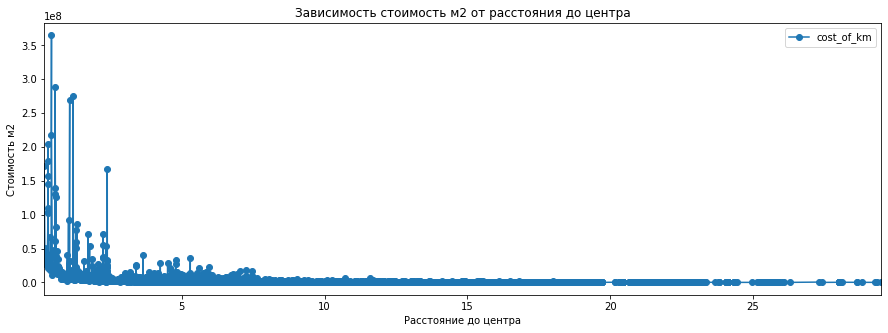

In [65]:
(spb.sort_values(by='cityCenters_nearest_in_km',ascending=True).plot(x='cityCenters_nearest_in_km',y='cost_of_km', style='o-',figsize=(15,5)))
plt.title('Зависимость стоимость м2 от расстояния до центра')
plt.xlabel('Расстояние до центра')
plt.ylabel('Стоимость м2')

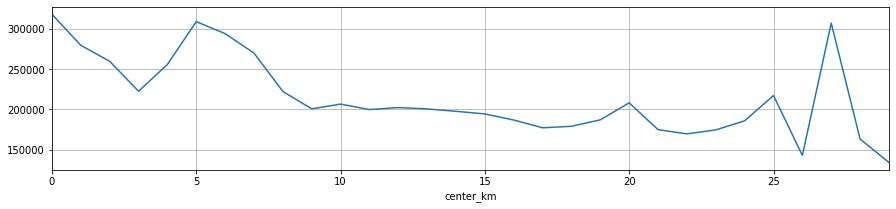

In [66]:
data['center_km'] = data['cityCenters_nearest'] //1000
report = (data.query('locality_name=="Санкт-Петербург"').groupby('center_km').agg({'price_for_m2':'mean'}).rename(columns = {'price_for_m2': 'Средняя цена м2'}))
report['Средняя цена м2'].plot(grid = True, figsize = (15,3))
plt.show()

Видно, что после 5 км график почти не меняется. Значит расстояние меньше 5 км можно считать центром.

Выделим только квартиры в центре

In [67]:
spb=spb.query('cityCenters_nearest_in_km<5')
#Количество квартир в центре
len(spb)

1818

Выделим самые самые квартиры в центре Питера

In [68]:
top_spb = true_days_exposition_date.query('cityCenters_nearest_in_km<5 and locality_name=="Санкт-Петербург"')
top_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,week_day,month,year,floor_position,living_area/total_area,kitchen_area/living_area,cityCenters_nearest_in_km,cost_of_km
24,8,6500000.0,97.2,2015-10-31,2,2.65,8,46.5,1,False,False,False,19.6,0.0,Санкт-Петербург,20052.0,2336.0,3,411.000000,3,124.000000,265,139784.946237,5,10,2015,Первый,0.478395,0.421505,2.336,2.782534e+06
35,6,15500000.0,149.0,2017-06-26,5,2.65,6,104.0,4,False,False,False,17.0,0.0,Санкт-Петербург,23670.0,3502.0,0,490.830729,1,779.000000,644,149038.461538,0,6,2017,Другой,0.697987,0.163462,3.502,4.426042e+06
61,18,7990000.0,74.0,2017-08-24,2,2.65,18,43.0,4,False,False,False,20.0,0.0,Санкт-Петербург,22568.0,4288.0,1,363.000000,0,518.059879,609,185813.953488,3,8,2017,Другой,0.581081,0.465116,4.288,1.863340e+06
63,2,20000000.0,118.0,2018-09-11,3,3.00,2,68.0,7,False,False,False,16.0,0.0,Санкт-Петербург,26055.0,4800.0,1,648.000000,1,779.000000,37,294117.647059,1,9,2018,Другой,0.576271,0.235294,4.800,4.166667e+06
99,32,9600000.0,90.0,2017-09-26,4,2.65,32,67.0,2,False,False,False,8.0,0.0,Санкт-Петербург,23277.0,2818.0,0,490.830729,0,518.059879,104,143283.582090,1,9,2017,Другой,0.744444,0.119403,2.818,3.406671e+06


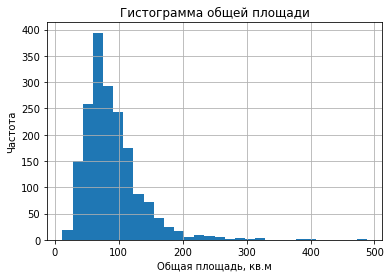

In [69]:
top_spb['total_area'].hist(bins=30)
plt.title('Гистограмма общей площади')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Частота')
plt.show()

Из гистограммы видно, что чаще всего продаются квартиры от 60-70 м2. Тогда как по всем областям, больше всего продавались квартиры площадью 47-49 м2.

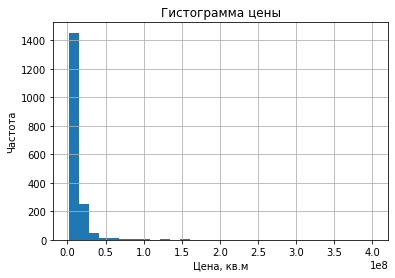

In [70]:
top_spb['last_price'].hist(bins=30)
plt.title('Гистограмма цены')
plt.xlabel('Цена, кв.м')
plt.ylabel('Частота')
plt.show()

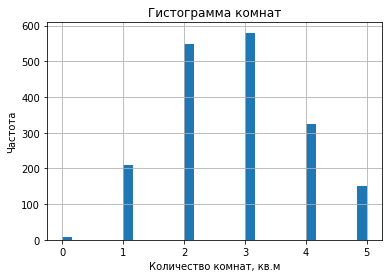

In [71]:
top_spb['rooms'].hist(bins=30)
plt.title('Гистограмма комнат')
plt.xlabel('Количество комнат, кв.м')
plt.ylabel('Частота')
plt.show()

Из гистограммы видно, что чаще всего продаются квартиры с 2-мя или 3-мя комнатами. Тогда как по гистограмме по всем областям было видно, что так же часто продавались и квартиры с 1 комнатой.

Text(0, 0.5, 'Частота')

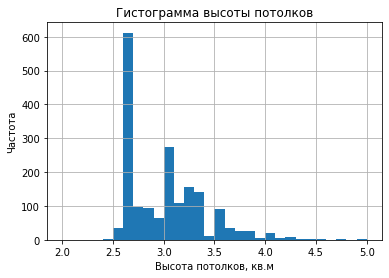

In [72]:
top_spb['ceiling_height'].hist(bins=30, range=(2,5))
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолков, кв.м')
plt.ylabel('Частота')

Чаще всего продаются квартиры с высотой потолка 2,6 метра. Значение такое же как значение, когда мы брали данные по всем областям.

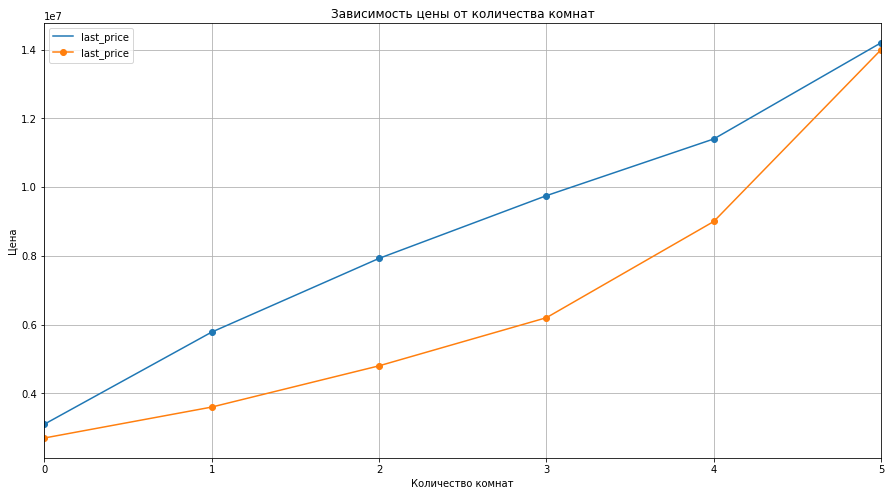

In [73]:
(top_spb.sort_values(by='last_price',ascending=True).groupby('rooms')['last_price'].median().plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(15,8),legend=True))


(true_days_exposition_date .groupby('rooms')['last_price'].median().plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(15,8),legend=True))
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')

plt.show()

С увеличением комнат, увеличивается стоимость. График квартир в центе сдвинут выше графика остальных квартир, значит квартиры в центе дороже.

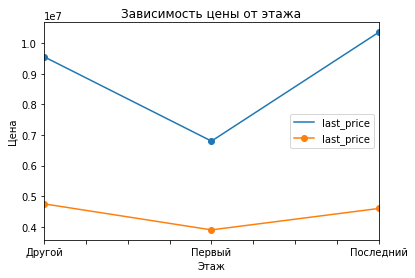

In [74]:
(top_spb.groupby('floor_position')['last_price'].median().plot(x='floor_position',y='last_price',style='o-',legend=True))


(true_days_exposition_date.groupby('floor_position')['last_price'].median().plot(x='floor_position',y='last_price',style='o-',legend=True))
plt.title('Зависимость цены от этажа')
plt.xlabel('Этаж')
plt.ylabel('Цена')

plt.show()

Опять же видно, что квартиры в центре дороже, график находится выше. Квартиры на последнем этаже дороже всего.

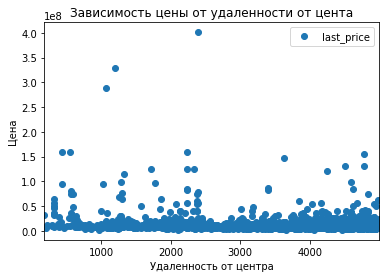

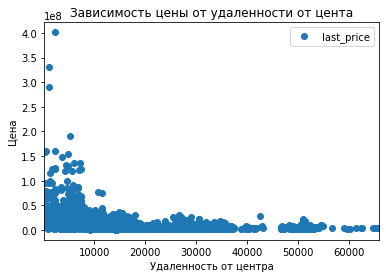

In [75]:
(top_spb.sort_values(by='cityCenters_nearest',ascending=True).plot(x='cityCenters_nearest',y='last_price',style='o'))
plt.title('Зависимость цены от удаленности от цента')
plt.xlabel('Удаленность от центра')
plt.ylabel('Цена')
(true_days_exposition_date.sort_values(by='cityCenters_nearest',ascending=True).plot(x='cityCenters_nearest',y='last_price',style='o'))
plt.title('Зависимость цены от удаленности от цента')
plt.xlabel('Удаленность от центра')
plt.ylabel('Цена')

plt.show()

По верхней гистограмме видно, что больше всего квартир на расстоянии 4-5 км от центра

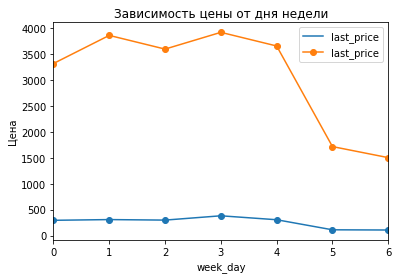

In [76]:
(top_spb.groupby('week_day')['last_price'].count().plot(x='week_day',y='last_price',style='o-',legend=True))
plt.title('Зависимость цены от дня недели')
plt.xlabel('День недели')
plt.ylabel('Цена')

(true_days_exposition_date.groupby('week_day')['last_price'].count().plot(x='week_day',y='last_price',style='o-',legend=True))
plt.show()

В течении недели квартиры продаются почти одинаково, только в выходные спад. Общий тренд у 2 графиков.

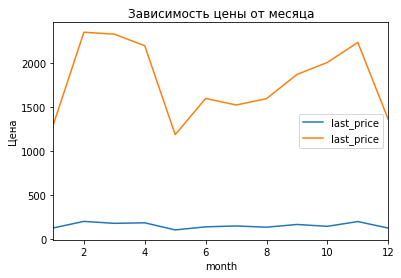

In [77]:
(top_spb.groupby('month')['last_price'].count().plot(x='month',y='last_price',style='-',legend=True))
plt.title('Зависимость цены от месяца')
plt.xlabel('Месяц')
plt.ylabel('Цена')

(true_days_exposition_date.groupby('month')['last_price'].count().plot(x='month',y='last_price',style='-',legend=True))

plt.show()

Так же спады намечаются в декабре, январе и мае. Такой же тренд как и продажи квартир в общем.

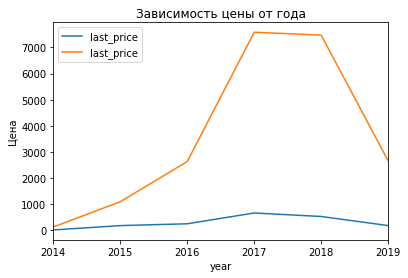

In [78]:
(top_spb.groupby('year')['last_price'].count().plot(x='year',y='last_price',style='-',legend=True))
plt.title('Зависимость цены от года')
plt.xlabel('Год')
plt.ylabel('Цена')
(true_days_exposition_date.groupby('year')['last_price'].count().plot(x='year',y='last_price',style='-',legend=True))

plt.show()

Всплеск продаж так же обнаружен в 2017 и 2018 году.

## Общий вывод

Если обобщить все данные, то получается:
1. Лучше всего квартиры продавались в 2017 и 2018 году.
2. Лучше всего квартиры продавались по будням.
3. Хуже всего квартиры продавались в мае, январе и декабре.
4. Лучше всего продавались 1-3 комнатные квартиры.
5. Хуже всего продавались квартиры на первом этаже.
6. Стоимость увеличивалась от увеличения кол-ва комнат, высоты потолков и близости к центру.
7. Квартиры в Санкт-Петербурге самые дорогие и поддаются тем же зависимостям, что и квартиры в общем.
Это самые важные выводы.